In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("C:/Users/taylu/OneDrive/Desktop/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
y=data.iloc[:,-1]
x=data.loc[:,'age':'thal']

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Logistic Regression 

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)
model1=LogisticRegression()
scaler = StandardScaler().fit(x_train)
xs_train= scaler.transform(x_train)
model1.fit(xs_train,y_train)
from sklearn.metrics import accuracy_score
model1.score
xs=pd.DataFrame(xs_train)
xs

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.270009,0.739895,1.031281,-0.102004,1.427938,-0.398083,0.839329,0.527421,-0.657596,0.669704,0.975399,0.325523,-0.534723
1,-0.373656,0.739895,-0.947286,0.455340,0.360830,-0.398083,-1.033700,1.584755,1.520691,-0.911520,0.975399,-0.704490,-0.534723
2,-1.718185,-1.351542,1.031281,-2.108443,-0.864369,-0.398083,0.839329,1.276366,-0.657596,-0.911520,0.975399,-0.704490,-0.534723
3,0.298608,-1.351542,-0.947286,-0.213473,1.190803,-0.398083,-1.033700,0.395254,-0.657596,-0.911520,0.975399,0.325523,-0.534723
4,-0.485700,-1.351542,0.041998,-0.659348,0.024888,-0.398083,0.839329,0.527421,-0.657596,0.003926,0.975399,-0.704490,-0.534723
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,-0.373656,0.739895,1.031281,-2.108443,-0.311054,-0.398083,0.839329,0.174976,1.520691,-0.911520,0.975399,0.325523,1.108194
208,0.410652,-1.351542,0.041998,0.232402,1.506983,2.512040,-1.033700,0.086864,-0.657596,-0.911520,0.975399,1.355535,-0.534723
209,1.194960,0.739895,-0.947286,0.176668,0.222501,-0.398083,-1.033700,-1.014526,-0.657596,1.418704,-0.627582,0.325523,1.108194
210,0.186564,-1.351542,-0.947286,3.799403,0.894384,2.512040,-1.033700,-0.750192,1.520691,2.417372,-2.230564,1.355535,1.108194


In [8]:
scaler2 = StandardScaler().fit(x_test)
xs_test= scaler.transform(x_test)
y_predict=model1.predict(xs_test)

In [9]:
confusion_matrix(y_test,y_predict)

array([[31,  8],
       [14, 38]], dtype=int64)

In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
model1.score(xs_test,y_test)

0.7582417582417582

In [12]:
model1.score(xs_train,y_train)

0.8537735849056604

# K Nearest Neighbor

In [15]:
from sklearn.neighbors import KNeighborsClassifier 

In [36]:
knn_scores=[]
for k in range(1,21):
    model2= KNeighborsClassifier(n_neighbors=k)
    model2.fit(xs_train,y_train)
    score=model2.score(xs_train,y_train)
    knn_scores.append(score)

Text(0.5, 1.0, 'Train Data scores')

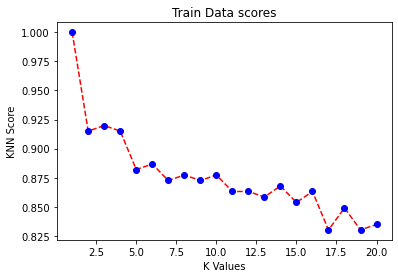

In [43]:
plt.plot([k for k in range(1,21)],knn_scores,'r--')
plt.plot([k for k in range(1,21)],knn_scores,'bo')
plt.xlabel("K Values")
plt.ylabel("KNN Score")
plt.title("Train Data scores")

In [46]:
knn_scores

[1.0,
 0.9010989010989011,
 0.9120879120879121,
 0.9010989010989011,
 0.8681318681318682,
 0.8571428571428571,
 0.8681318681318682,
 0.8461538461538461,
 0.8681318681318682,
 0.8351648351648352,
 0.8681318681318682,
 0.8791208791208791,
 0.8791208791208791,
 0.8571428571428571,
 0.8681318681318682,
 0.8571428571428571,
 0.8351648351648352,
 0.8351648351648352,
 0.8131868131868132,
 0.8461538461538461]

Text(0.5, 1.0, 'Test Data scores')

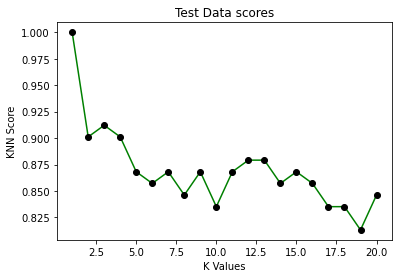

In [44]:
knn_scores=[]
for k in range(1,21):
    model2= KNeighborsClassifier(n_neighbors=k)
    model2.fit(xs_test,y_test)
    score=model2.score(xs_test,y_test)
    knn_scores.append(score)
plt.plot([k for k in range(1,21)],knn_scores,'g-')
plt.plot([k for k in range(1,21)],knn_scores,'ko')
plt.xlabel("K Values")
plt.ylabel("KNN Score")
plt.title("Test Data scores")

In [45]:
y_predict=model2.predict(xs_test)
confusion_matrix(y_test,y_predict)

array([[29, 10],
       [ 4, 48]], dtype=int64)

In [51]:
    model_2= KNeighborsClassifier(n_neighbors=1)
    model_2.fit(xs_test,y_test)
    score1=model_2.score(xs_test,y_test)
    score1
    y1=model_2.predict(xs_test)
    confusion_matrix(y_test,y1)

array([[39,  0],
       [ 0, 52]], dtype=int64)